In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from qutip import *

In [2]:
from sympy import symbols, Eq, solve, summation
from sympy.functions import exp

In [3]:
from scipy.optimize import minimize_scalar
import math

In [4]:
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [5]:
def func(x,Nmax,nbar):
    
    Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))
    n = np.exp(-Nmax*x)*(np.exp((Nmax + 1)*x) -(Nmax+1)*np.exp(x) + Nmax)/(np.exp(x) -1)**2
    
    
    return np.abs(nbar - n/Z)

In [6]:
Nmax=14
nbar=3
res = minimize_scalar(func,args=(Nmax,nbar),bounds=(0, 1), method='bounded')

In [7]:
x = res.x

In [8]:
hbar = 1.054571817e-34
kB = 1.380649e-23
omega = 2*np.pi*1.4*10e6
#x = 0.184132
Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))

T = hbar*omega/(kB*x)
T

0.002527075613606284

In [9]:
P = []
for i in range(Nmax+1): #Nmotion=15 but for <n> =3 keep up to i=10
    P.append(np.exp(-i*x)/Z)

In [10]:
sum(P)

1.0

In [11]:
Pn = []
for i in range(Nmax+1):
    Pn.append(np.exp(-i*x)/Z*i)

In [12]:
sum(Pn) #<n>

2.9999994106949863

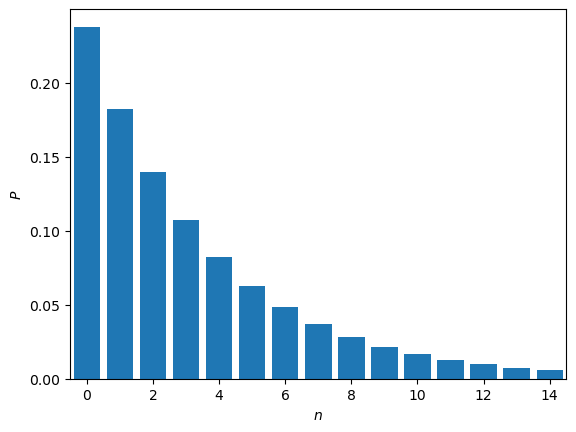

In [13]:
plt.figure()
plt.bar(np.arange(0,Nmax+1),P)
plt.ylabel('$P$')
plt.xlabel('$n$')
plt.xlim(-0.5,Nmax+0.5)
plt.show()

In [14]:
P[-1]

0.005751477788089598

## B = 4G, Δ$_{1,0}$ = 10 ΜHz, Δ$_{1,1}$ = 22.1 ΜHz, Δ$_{1,2}$ = 20 ΜΗz, ω = 1.4 ΜΗz,
## Ω$_{1,0}$ = Ω$_{1,2}$ = 70 ΜHz, Ω$_{1,1}$ = 19 ΜΗz, state 7

In [ ]:
n = []
t = []
n_dev = []
for i in range(Nmax+1):
    t.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 0])
    n.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 1])
    n_dev.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:, 0])

In [16]:
nMC = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC +=np.array(n[i])*P[i]

In [17]:
nMC_dev = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC_dev += np.array(n_dev[i])*P[i]
nMC_dev = nMC_dev/np.sqrt(500-1)

In [ ]:
pops = []
pops_divs = []
for j in range(60):
    pop = []
    pop_div = []
    for i in range(Nmax+1):
        pop.append(P[i]*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:,j+2])
        pop_div.append(P[i]*np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:,j+1])
    pop_=np.sum(pop,axis=0)
    pop_div_=np.sum(pop_div,axis=0)
    
    pops.append(pop_)
    pops_divs.append(pop_div_)

pops_divs = pops_divs/np.sqrt(500-1)

In [20]:
plt.rcParams.update({'font.size': 8})

In [21]:
# Get colors from multiple qualitative colormaps
colors = []
colors += list(plt.get_cmap("tab20").colors)   # 20 colors from tab20
colors += list(plt.get_cmap("tab20b").colors)  # 20 colors from tab20b
colors += list(plt.cm.Paired(np.linspace(0,1,12)))
colors += list(plt.get_cmap("tab20c").colors)  # 20 colors from tab20c

In [22]:
len(colors)

72

In [23]:
len(pops)

60

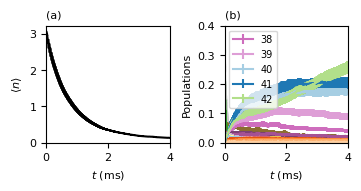

In [24]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(3.5,1.8))

gs = GridSpec(1, 2, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,4)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(60):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
i=38
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=39
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=40
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=41
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=42
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])

ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0,0.4)
ax3.set_xlim(0,4)
ax3.legend(loc='upper left',prop={'size': 7})


plt.savefig("I7_populations.pdf",bbox_inches = "tight")


plt.show()

## 100 trajactories starting at n=3 state to approximate steady state

In [ ]:
n1 = []
t1 = []
n_dev1 = []
i =3
t1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_100_improved_step_steady.txt")[:, 0])
n1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_100_improved_step_steady.txt")[:, 1])
n_dev1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_100_stds_improved_step_steady.txt")[:, 0])

In [ ]:
pop1 = []
pop_div1 = []
for j in range(60):
    
    pop1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_100_improved_step_steady.txt")[:,j+2])
    pop_div1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_"+str(i)+"_Gamma_2.44745_ntraj_100_stds_improved_step_steady.txt")[:,j+1])

pop_div1 = pop_div1/np.sqrt(100-1)

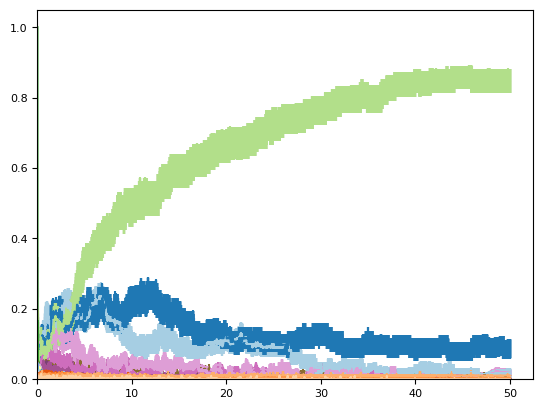

In [27]:
plt.figure()

for j in range(60):
    plt.errorbar(t1[0]*1e-3,pop1[j],yerr = pop_div1[j],label=str(j),color=colors[j])
plt.xlim(0)
plt.ylim(0)
#plt.legend()
plt.show()

In [28]:
for i in range(60):
    if pop1[i][-1]>=0.005:
        print(i)
        print(pop1[i][-1])

39
0.01686256
40
0.01763524
41
0.08675336
42
0.84811923
58
0.01059987


## Populations no motion

In [ ]:
t1 = np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_Gamma_15.377781880056677_ntraj_500_improved_step_nomo.txt")[:,0]

In [ ]:
pop1 = []
pop_div1 = []
for i in range(60):
    pop1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_Gamma_15.377781880056677_ntraj_500_improved_step_nomo.txt")[:,i+1])
    pop_div1.append(np.loadtxt(""+str(path_name)+"data_B4.0_D10_10_D12_20_O10_O11_70_O11_19_Gamma_15.377781880056677_ntraj_500_stds_improved_step_nomo.txt")[:,i])
    
pop_div1 = pop_div1/np.sqrt(500-1)

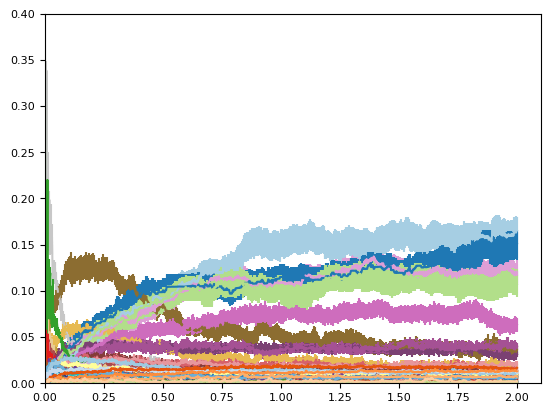

In [31]:
plt.figure()

for j in range(60):
    plt.errorbar(t1*1e-3,pop1[j],yerr = pop_div1[j],label=str(j),color=colors[j])
plt.xlim(0)
plt.ylim(0,0.4)
plt.show()